# 🌄 Gradient Descent — Quick Overview

Gradient Descent (GD) is an optimization algorithm used to minimize a cost/loss function by iteratively adjusting parameters in the direction of the steepest descent (negative gradient).

---

## 🔧 Types of Gradient Descent

| Type                    | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| **Batch GD**            | Uses the full dataset to compute the gradient. Slow but accurate.           |
| **Stochastic GD (SGD)** | Uses one random instance per step. Noisy updates, but faster.               |
| **Mini-Batch GD**       | Uses small random subsets ("mini-batches"). Good trade-off between speed and noise. |

---

## 🧮 Update Rule

To update the parameter:

`parameter = parameter - learning_rate * slope`

- `parameter`: the value we are trying to optimize (e.g., a weight)
- `learning_rate`: how big a step we take during the update
- `slope`: the gradient (derivative) of the cost function at the current parameter

We subtract the slope to move in the direction that reduces the error (i.e., downhill).


## ⚠️ Common Pitfalls

- **If the learning rate is too small**:  
  The model learns very slowly and takes a long time to reach a good result.

- **If the learning rate is too large**:  
  The model might keep jumping around and never settle down — it could even get worse instead of better.

---



In [ ]:
from sklearn.datasets import make_regression
import numpy as np

X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [3]:
print(X)
print(y)

[[-0.71239066]
 [ 0.45181234]
 [-0.04450308]
 [ 0.75376638]]
[  7.21786552  16.04609925 -27.83756166 144.36688189]


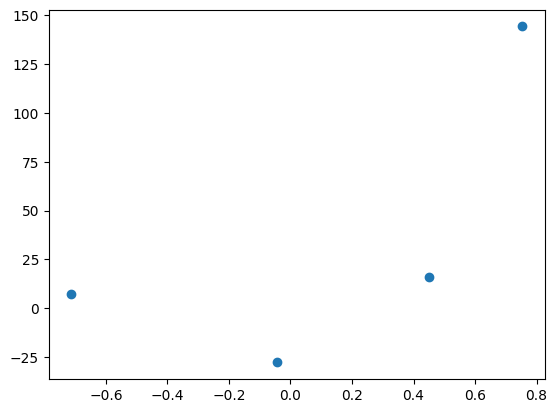

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[78.35063668]
26.15963284313262


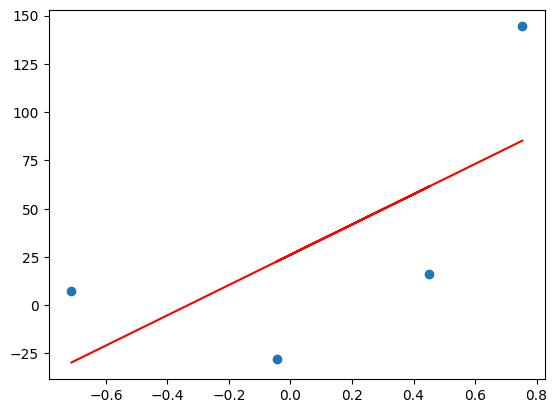

In [6]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red')

In [7]:
m=reg.coef_[0]
b=0
y_pred=(m*X+b).reshape(4)

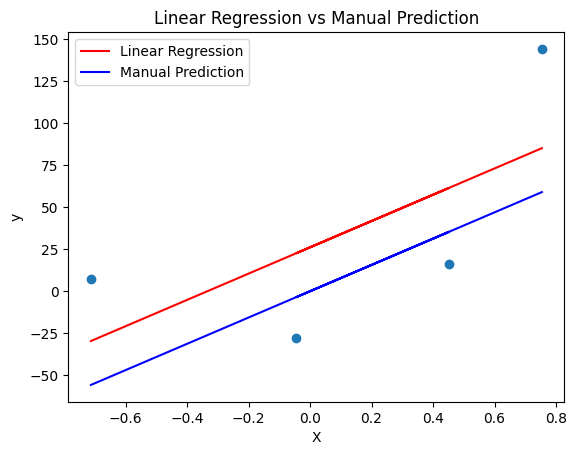

In [8]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red', label='Linear Regression')
plt.plot(X, y_pred, color='blue', label='Manual Prediction')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression vs Manual Prediction')
plt.show()

# Loss Function Derivation for Linear Regression

## Mean Squared Error Loss Function

The loss function is defined as:

$$
\text{loss\_function} = \sum (y_i - y_{\text{pred}_i})^2 
$$

For linear regression where $y_{\text{pred}_i} = m x_i + b$:

$$
\text{loss\_function} = \sum (y_i - (m x_i + b))^2
$$

## Calculating the Partial Derivative with Respect to b

We want to find the slope of the loss function with respect to the bias term $b$ (holding $m$ constant):

$$
\text{loss\_slope} = \frac{d(\text{loss\_function})}{db}
$$

Substituting the loss function:

$$
\text{loss\_slope} = \frac{d\left(\sum (y_i - (m x_i + b))^2\right)}{db}
$$

Applying the chain rule:

$$
\text{loss\_slope} = \sum 2(y_i - (m x_i + b)) \cdot (-1)
$$

Simplifying:

$$
\text{loss\_slope} = -2 \sum (y_i - (m x_i + b))
$$

Final form:

$$
\text{loss\_slope} = -2 \sum (y_i - m x_i - b)
$$


24


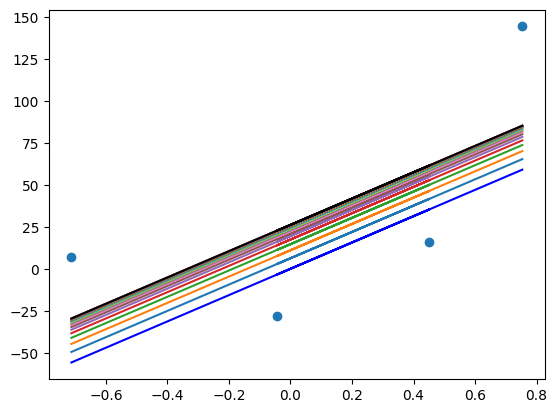

In [9]:
m=reg.coef_[0]
b=0
y_pred=(m*X+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,y_pred,color='blue')

for i in range(30):
    loss_slope=-2*np.sum(y - m*X.ravel() - b)
    learning_rate=0.03
    step_size=learning_rate * loss_slope
    b = b - step_size
    y_pred=(m*X+b).reshape(4)
    plt.plot(X, y_pred)
    if np.abs(step_size) < 0.01:
        print(i)
        break

plt.plot(X,reg.predict(X), color='black', label='Linear Regression')

24


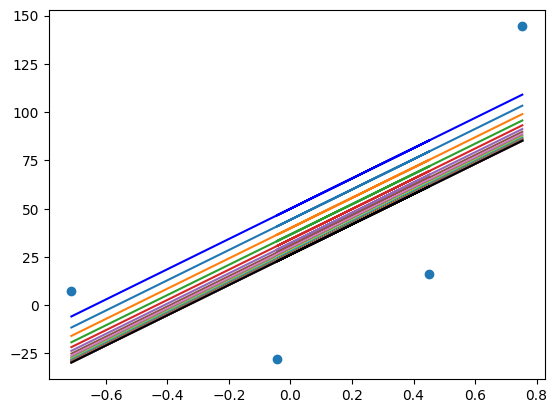

In [10]:
m=reg.coef_[0]
b=50
y_pred=(m*X+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,y_pred,color='blue')

for i in range(30):
    loss_slope=-2*np.sum(y - m*X.ravel() - b)
    learning_rate=0.03
    step_size=learning_rate * loss_slope
    b = b - step_size
    y_pred=(m*X+b).reshape(4)
    plt.plot(X, y_pred)
    if np.abs(step_size) < 0.01:
        print(i)
        break

plt.plot(X,reg.predict(X), color='black', label='Linear Regression')

# Custom 

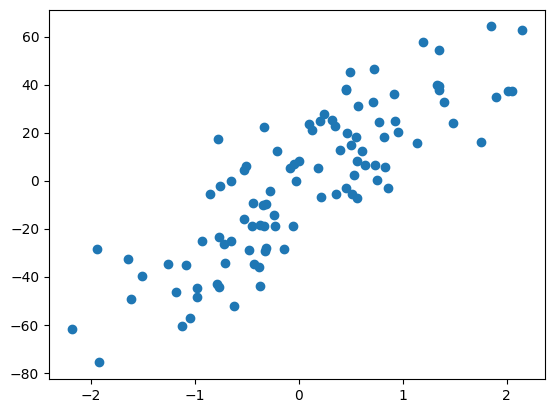

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

[27.82809103]
-2.29474455867698


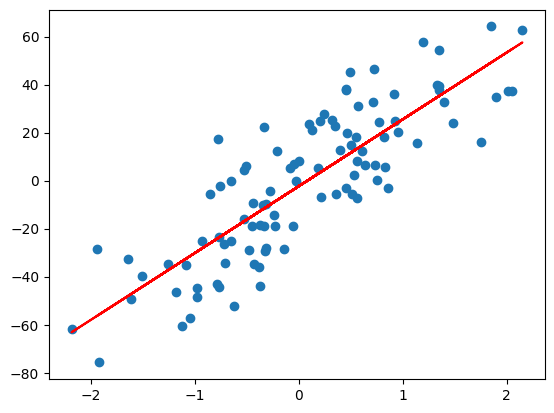

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='red', label='Linear Regression')

In [14]:
m=27.82809103252014

In [15]:
class Grad_Desc:

    def __init__(self,learning_rate,times):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.times=times

    def fit(self,X,y):
        for _ in range(self.times):
            loss_slope=-2*np.sum(y-self.m*X.ravel()-self.b)
            step_size=self.lr*loss_slope
            self.b=self.b-step_size
            print(loss_slope,self.b)
        print(self.b)


# higher learning rate, lower loop

In [16]:
gd=Grad_Desc(.01,10)
gd.fit(X,y)

-22697.976504888527 106.97976504888527
22697.976504888524 -119.99999999999997
-22697.97650488852 106.97976504888524
22697.976504888517 -119.99999999999991
-22697.976504888513 106.97976504888521
22697.976504888517 -119.99999999999994
-22697.976504888513 106.97976504888518
22697.97650488851 -119.99999999999991
-22697.976504888513 106.97976504888521
22697.976504888517 -119.99999999999994
-119.99999999999994


# lower learning rate, higher loop

In [17]:
gd=Grad_Desc(.001,50)
gd.fit(X,y)

-22697.976504888527 -97.30202349511147
-18158.38120391082 -79.14364229120065
-14526.704963128655 -64.616937328072
-11621.363970502924 -52.99557335756907
-9297.091176402339 -43.69848218116673
-7437.672941121872 -36.26080924004486
-5950.138352897496 -30.31067088714736
-4760.110682317998 -25.550560204829363
-3808.0885458543985 -21.742471658974964
-3046.4708366835184 -18.696000822291445
-2437.1766693468144 -16.25882415294463
-1949.7413354774524 -14.309082817467178
-1559.7930683819616 -12.749289749085216
-1247.8344547055692 -11.501455294379646
-998.2675637644552 -10.50318773061519
-798.6140510115642 -9.704573679603627
-638.8912408092514 -9.065682438794376
-511.1129926474012 -8.554569446146974
-408.8903941179209 -8.145679052029054
-327.112315294337 -7.818566736734717
-261.68985223546974 -7.556876884499248
-209.35188178837493 -7.347525002710873
-167.48150543070045 -7.180043497280173
-133.9852043445602 -7.046058292935613
-107.18816347564808 -6.938870129459965
-85.75053078051916 -6.853119598679

# for both m and b

In [18]:
class Grad_Desc_m_b:

    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        for _ in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            step_size=self.lr*loss_slope_b
            self.b=self.b-step_size
            step_size=self.lr*loss_slope_m
            self.m=self.m-step_size
        print(self.m,self.b)


In [19]:
gd=Grad_Desc_m_b(.001,50)

In [20]:
gd.fit(X,y)

27.837060471820052 -2.2991839308293196
